In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [3]:
salary = pd.read_csv("salaries.csv")
salary

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [6]:
#drop the salary column 
input = salary.drop("salary_more_then_100k", axis = "columns")
input

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [8]:
target= salary["salary_more_then_100k"]
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [15]:
#convert inputs data to dummy variable
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [17]:
input.head(2)

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters


Label Encoding is appropriate when dealing with ordinal data or when dealing with algorithms that can interpret the ordinality properly, while one hot encoding is suitable for norminal data or when we want to avoid introducing any ordinal relationship among categories 

In [18]:
#using fit_transform 
input["company_x"] = le_company.fit_transform(input["company"])
input["job_x"] = le_company.fit_transform(input["job"])
input["degree_x"] = le_company.fit_transform(input["degree"])

In [19]:
input

,company,job,degree,company_x,job_x,degree_x
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [21]:
#drop the inital columns(company, job, degree)
final_dummy = input.drop(["company","job", "degree"], axis = "columns")
final_dummy

,company_x,job_x,degree_x
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [22]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [25]:
model = tree.DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [26]:
model.fit(final_dummy, target)

DecisionTreeClassifier()

In [27]:
model.score(final_dummy, target)

1.0

In [33]:
salary.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [35]:
final_dummy.head()

,company_x,job_x,degree_x
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [36]:
input.head()

,company,job,degree,company_x,job_x,degree_x
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


is salary of a google computer programmer with Bachelor degree >100k

In [30]:
model.predict([[2,1,0]])

/Users/balogun/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

is salary of a google computer programmer with Masters degree >100k

In [37]:
model.predict([[2,1,1]])

/Users/balogun/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

is salary of a facebook computer programmer with Masters degree >100k

In [39]:
model.predict([[1,1,1]])

/Users/balogun/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [38]:
input

,company,job,degree,company_x,job_x,degree_x
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


# RANDOM FOREST

It use a collection of decsion tree where each tree is constructed using a subset of the features and subset of the tranning data

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

dir means function that returns all properties and methods of a specified object without values

In [5]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

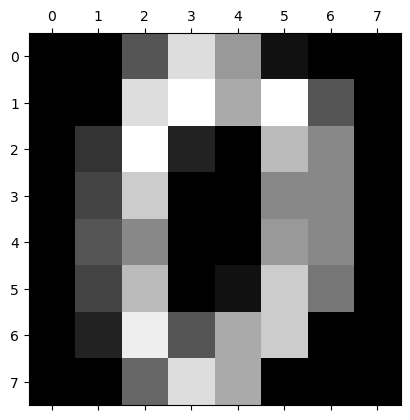

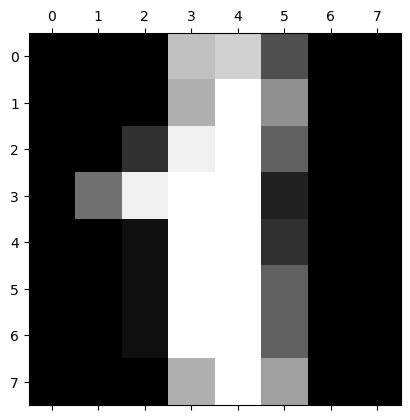

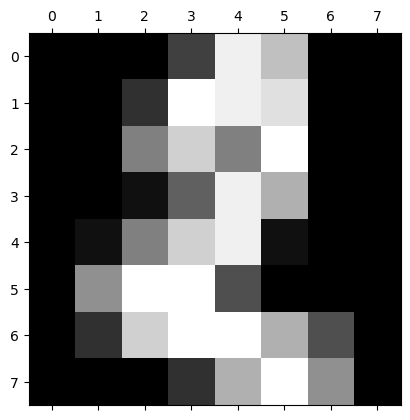

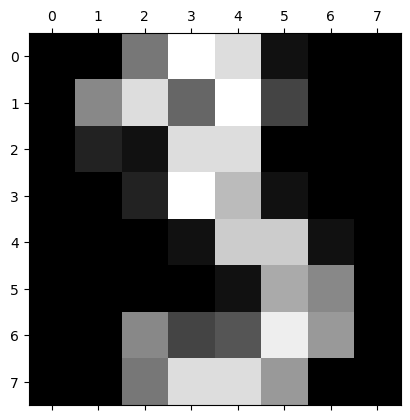

In [7]:
plt.gray()
for i in range (4):
    plt.matshow(digits.images[i])

In [9]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [11]:
df["target"] = digits.target

In [12]:
df[0:12]

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


Tranning, modeling and predction

In [15]:
x = df.drop("target", axis = "columns")
y = df.target

In [19]:
 X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [22]:
model = RandomForestClassifier( n_estimators = 20)
model.fit (X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [23]:
y_test

1096    9
594     0
29      9
569     8
1157    0
       ..
664     8
511     9
562     5
1510    6
1019    7
Name: target, Length: 540, dtype: int64

In [24]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
1096,0.0,0.0,7.0,12.0,11.0,1.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,8.0,12.0,16.0,13.0,2.0,0.0
594,0.0,0.0,2.0,11.0,15.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,16.0,12.0,1.0,0.0,0.0
29,0.0,0.0,9.0,13.0,7.0,0.0,0.0,0.0,0.0,0.0,...,16.0,2.0,0.0,0.0,7.0,12.0,12.0,12.0,11.0,0.0
569,0.0,0.0,0.0,6.0,14.0,4.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,5.0,10.0,15.0,13.0,0.0
1157,0.0,0.0,4.0,14.0,14.0,2.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,10.0,14.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,0.0,0.0,5.0,12.0,16.0,7.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,5.0,14.0,14.0,7.0,0.0,0.0
511,0.0,0.0,2.0,10.0,16.0,10.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,3.0,12.0,13.0,4.0,0.0,0.0
562,0.0,0.0,11.0,13.0,12.0,12.0,3.0,0.0,0.0,5.0,...,0.0,0.0,0.0,1.0,12.0,16.0,12.0,2.0,0.0,0.0
1510,0.0,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,2.0,10.0,16.0,16.0,5.0,0.0


In [25]:
model.score(X_test, y_test)

0.9611111111111111

In [27]:
y_predicted_value = model.predict(X_test)

In [28]:
y_predicted_value

array([9, 0, 3, 8, 0, 6, 1, 5, 7, 9, 1, 1, 5, 7, 6, 9, 0, 0, 6, 9, 3, 3,
       6, 9, 3, 6, 1, 4, 3, 5, 5, 2, 3, 7, 0, 1, 1, 0, 0, 1, 1, 3, 1, 9,
       7, 2, 1, 8, 9, 8, 9, 8, 8, 3, 9, 0, 6, 1, 5, 3, 4, 0, 1, 5, 9, 1,
       2, 7, 0, 3, 5, 0, 9, 7, 2, 6, 2, 0, 2, 1, 6, 2, 3, 6, 0, 9, 2, 2,
       8, 0, 3, 3, 8, 5, 9, 1, 4, 4, 5, 1, 6, 6, 4, 3, 4, 2, 9, 2, 1, 5,
       9, 4, 9, 0, 9, 0, 1, 4, 6, 6, 3, 8, 8, 5, 4, 0, 0, 9, 2, 1, 6, 9,
       8, 4, 6, 7, 9, 1, 4, 6, 3, 9, 9, 2, 5, 2, 4, 8, 2, 7, 4, 2, 8, 9,
       2, 3, 3, 6, 6, 0, 5, 3, 5, 6, 3, 1, 9, 8, 7, 4, 8, 9, 2, 1, 7, 5,
       5, 4, 5, 8, 8, 9, 5, 6, 5, 9, 4, 5, 6, 2, 0, 2, 6, 9, 9, 6, 8, 5,
       3, 7, 0, 5, 0, 1, 7, 2, 1, 0, 6, 4, 2, 7, 3, 8, 5, 4, 9, 7, 0, 5,
       1, 2, 8, 7, 4, 8, 8, 3, 2, 5, 8, 8, 5, 6, 4, 3, 3, 2, 7, 3, 5, 1,
       1, 1, 9, 1, 6, 6, 4, 9, 6, 8, 3, 5, 3, 3, 0, 7, 2, 3, 5, 4, 3, 5,
       0, 7, 7, 5, 1, 3, 1, 6, 6, 0, 4, 3, 9, 4, 6, 9, 0, 5, 8, 4, 9, 8,
       3, 6, 9, 5, 4, 7, 1, 5, 1, 1, 9, 4, 3, 4, 2,

confussion matrix (It  shows the performance of an algorithmic by presenting the actual and Predicted classes)

In [31]:
con_max = confusion_matrix(y_test, y_predicted_value)
con_max

array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 48,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1,  0, 57,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0, 57,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 49,  0,  0,  1,  2],
       [ 0,  0,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  1],
       [ 0,  2,  1,  0,  0,  1,  0,  0, 44,  0],
       [ 0,  1,  0,  1,  1,  3,  0,  1,  1, 57]])

True positive, true negative, false negative, false positive 

Text(95.72222222222221, 0.5, 'Truth')

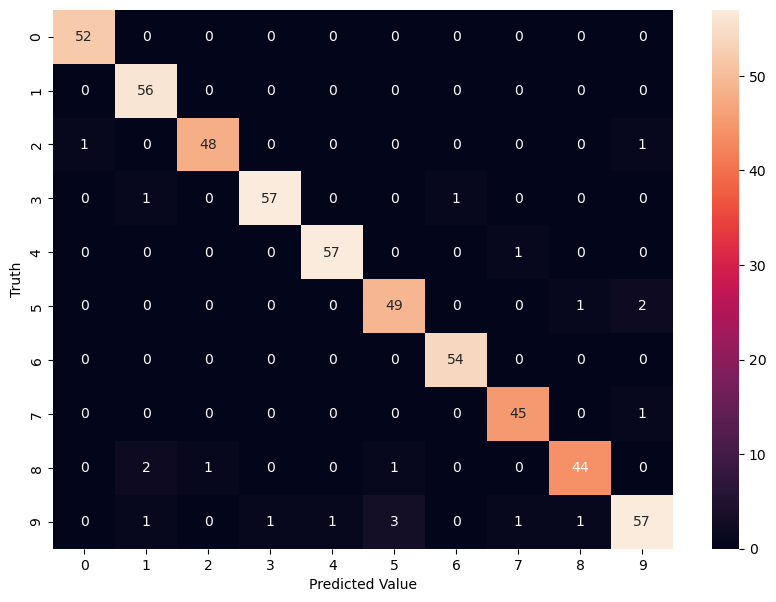

In [33]:
plt.figure(figsize = (10,7))
sns.heatmap(con_max, annot = True )
plt.xlabel("Predicted Value")
plt.ylabel("Truth")